<a href="https://colab.research.google.com/github/belkysupreme22/ML4HealthCare/blob/main/Heart%20Disease%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# Loading the dataset

In [ ]:
#mounting google drive to read dataset
from google.colab import drive
drive.mount('/content/drive')


In [4]:
#reading dataset from the drive and displaying the column headings
datasetPath = '/content/drive/My Drive/heart_disease.csv'
heart_disease = pd.read_csv(datasetPath)
print(heart_disease.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [5]:
heart_disease.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
heart_disease.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [7]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
heart_disease.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


Data visualization

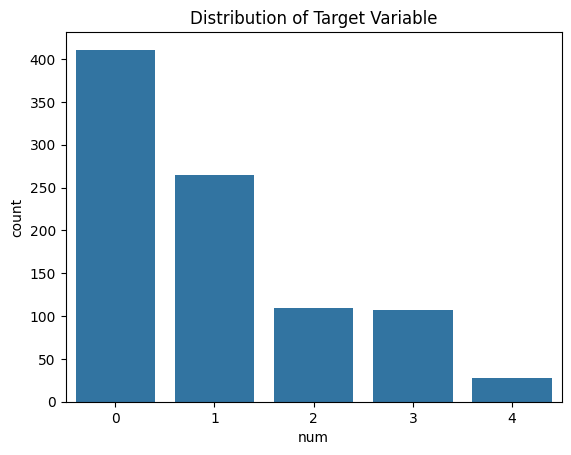

In [10]:
# Visualize Distribution of Target Variable
sns.countplot(x='num', data=heart_disease)
plt.title('Distribution of Target Variable')
plt.show()



In [11]:
print("heart disease data set dimensions : {}".format(heart_disease.shape))

heart disease data set dimensions : (920, 16)


In [14]:
heart_disease.groupby('num').size()

num
0    411
1    265
2    109
3    107
4     28
dtype: int64

In [13]:
heart_disease["num"].value_counts()*100/len(heart_disease)

num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: count, dtype: float64

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'num'}>,
        <Axes: >]], dtype=object)

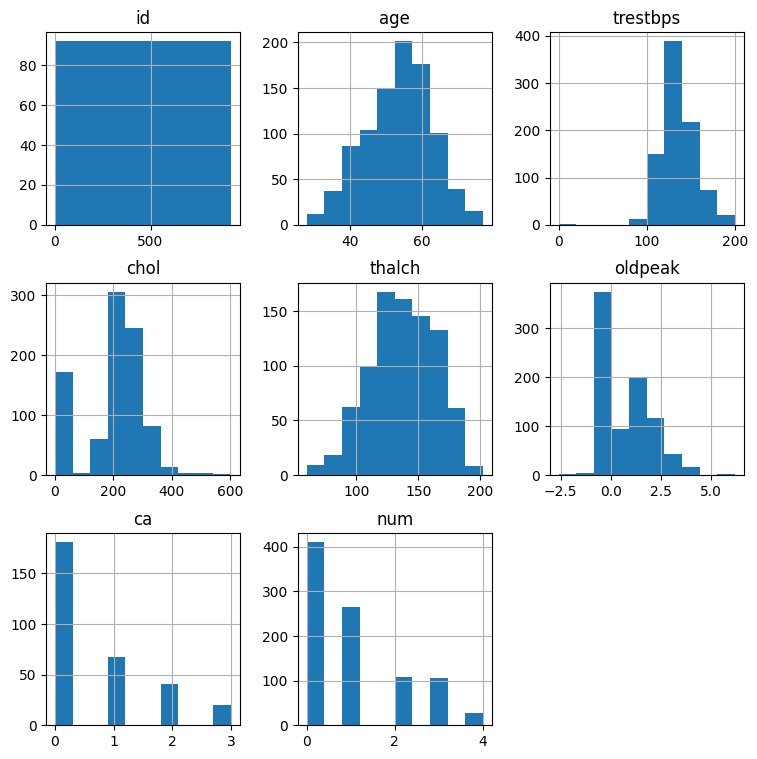

In [26]:
heart_disease.hist(figsize=(9, 9))

num
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
2    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
3    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
4    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

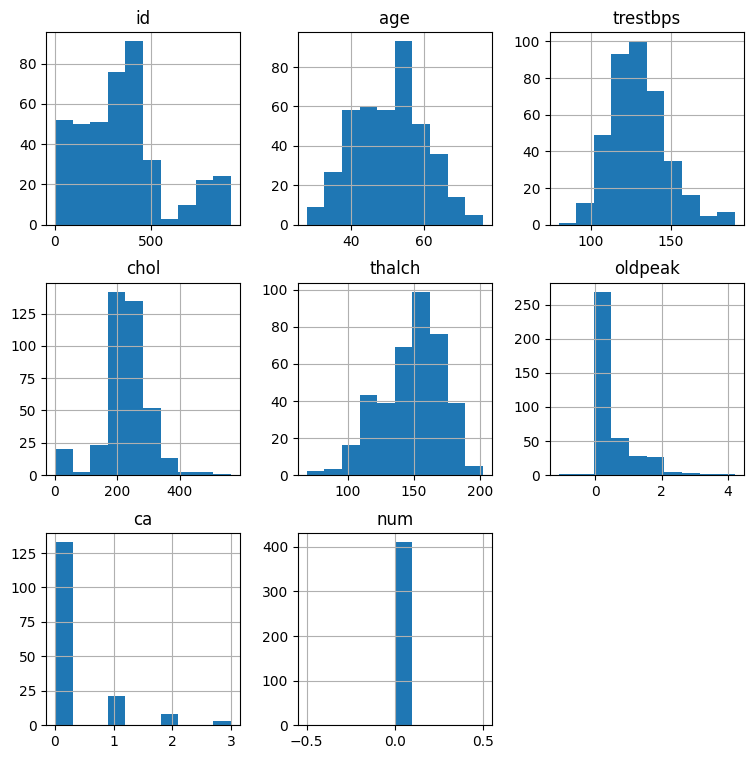

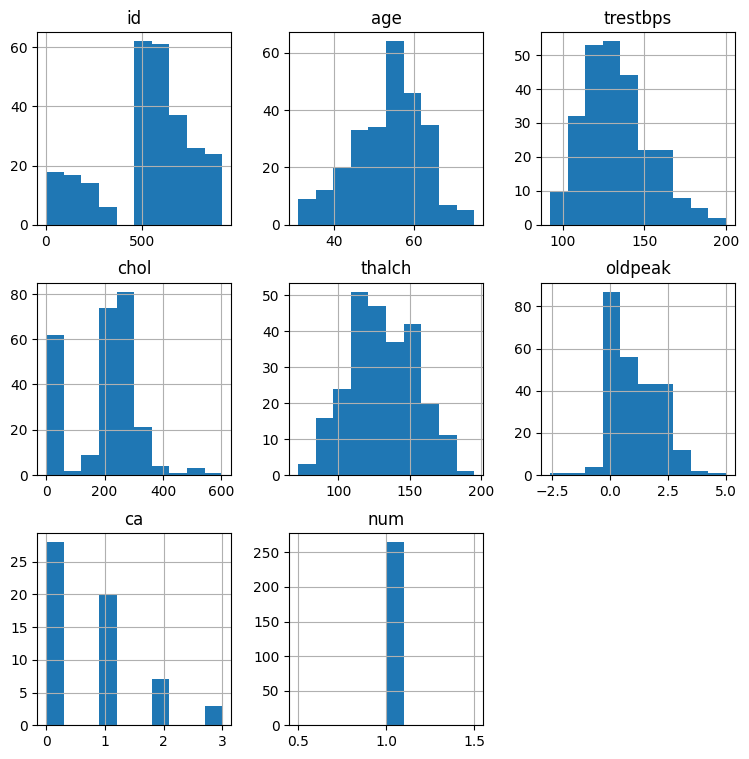

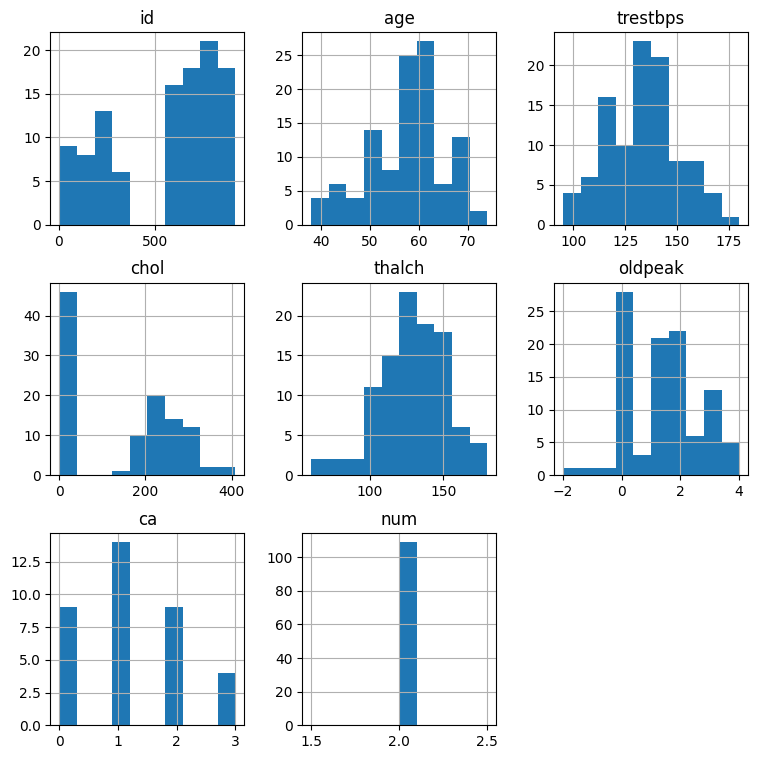

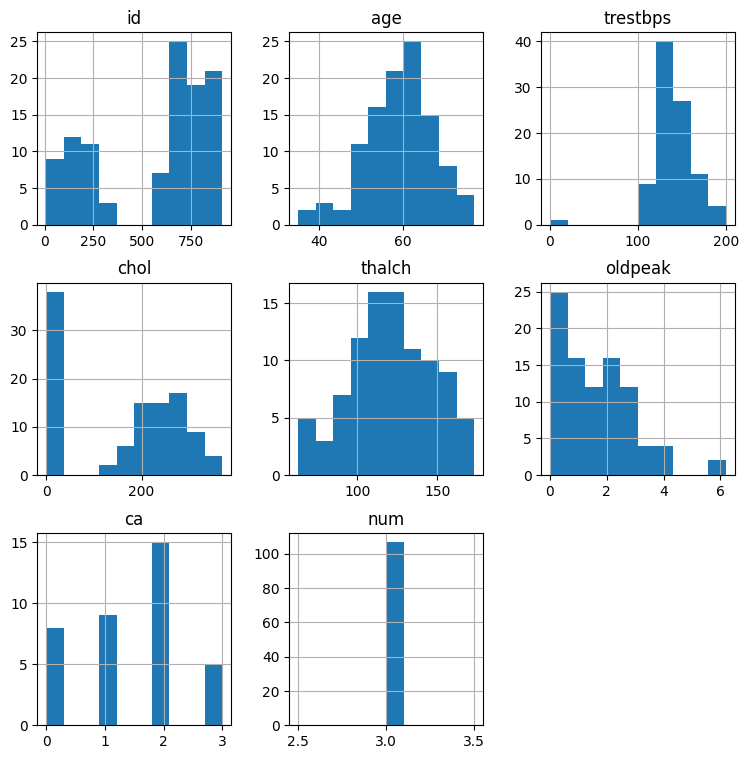

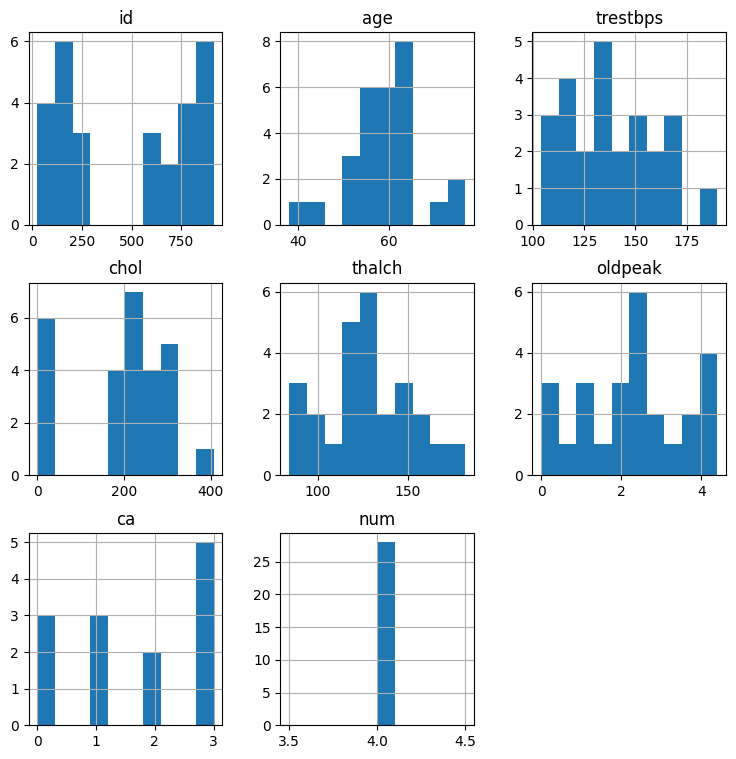

In [27]:
heart_disease.groupby('num').hist(figsize=(9, 9))

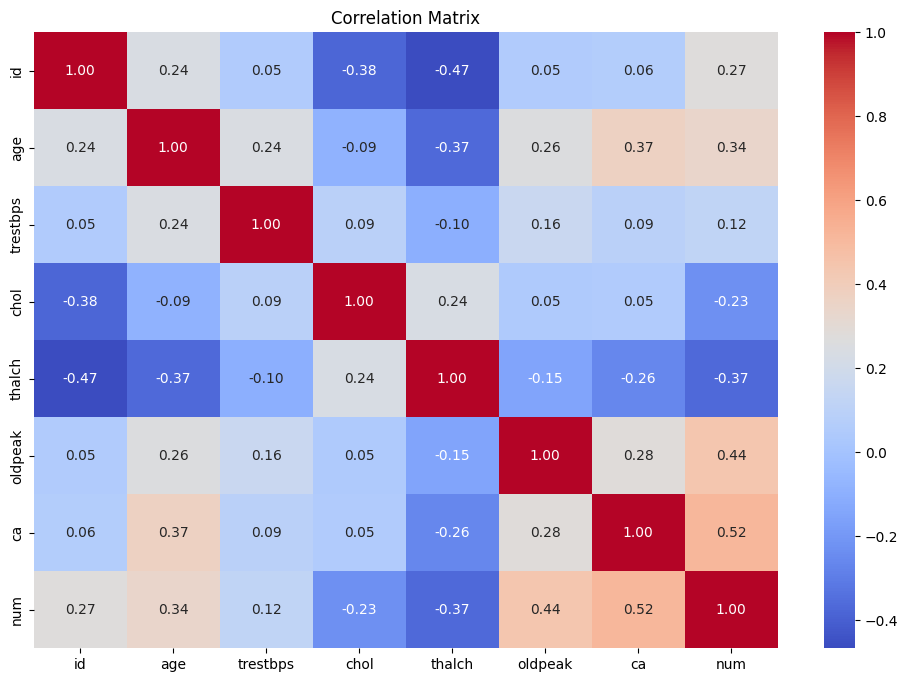

In [28]:
heart_disease_encoded = pd.get_dummies(heart_disease, columns=['sex'], drop_first=True)
numerical_cols = heart_disease_encoded.select_dtypes(include=['number']).columns
corr_matrix = heart_disease_encoded[numerical_cols].corr()

# Visualize Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data Cleaning

Missing or null data points

In [29]:
#checking for missing values in our datasset
missing_values = heart_disease.isnull().sum()
print(missing_values)


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [30]:
# Mean Imputation for Numerical Features
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_cols:
    heart_disease[col].fillna(heart_disease[col].mean(), inplace=True)

# Median Imputation for Numerical Features
for col in numerical_cols:
    heart_disease[col].fillna(heart_disease[col].median(), inplace=True)

# Mode Imputation for Categorical Features
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    heart_disease[col].fillna(heart_disease[col].mode()[0], inplace=True)


Missing values filled

In [31]:
heart_disease.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Feature Selection

In [50]:
# Perform one-hot encoding on categorical variables
heart_disease_encoded = pd.get_dummies(heart_disease, columns=['sex', 'dataset', 'cp', 'restecg', 'thal'])
# Print the column names after one-hot encoding
print(heart_disease_encoded.columns)

# Define the selected features
selected_features = [
    'cp_asymptomatic',         # Chest Pain Type
    'thal_normal',              # Thalassemia
    'ca',                       # Number of Major Vessels Colored by Fluoroscopy
    'thalch',                   # Maximum Heart Rate Achieved
    'oldpeak',                  # ST Depression Induced by Exercise
    'age',                      # Age
    'trestbps',                 # Resting Blood Pressure
    'chol'                      # Cholesterol Levels
]

# Split the dataset into features (X) and target variable (y)
X = heart_disease_encoded[selected_features]
y = heart_disease_encoded['num']


Index(['id', 'age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'slope', 'ca', 'num', 'sex_Female', 'sex_Male', 'dataset_Cleveland',
       'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach',
       'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')


# Model Selection

In [39]:
# Initial model selection process
models = []
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('NN', MLPClassifier()))


# Data Splitting

In [51]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (736, 8)
X_test shape: (184, 8)
Y_train shape: (736,)
Y_test shape: (184,)


In [45]:
print("{0:0.2f}% in training set".format((len(X_train)/len(heart_disease.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(heart_disease.index)) * 100))

80.00% in training set
20.00% in test set


# Training algorithm - Random forest model

In [52]:
# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Training algorithm - Gradient boosting

In [54]:
# Initialize and train the Gradient Boosting (GB) model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

# Training algorithm - Neural Network

In [56]:
# Neural Network (NN) model
ann = MLPClassifier(solver="adam", max_iter=5000, activation = "relu",
                    hidden_layer_sizes = (12),
                    alpha = 0.01,
                    batch_size = 64,
                    learning_rate_init = 0.001,
                    random_state=2)

ann.fit(X_train, y_train.ravel());
ann

MLPClassifier(alpha=0.01, batch_size=64, hidden_layer_sizes=12, max_iter=5000,
              random_state=2)

# Heart Disease Prediction on train dataset

In [57]:
# Make predictions on the training set
y_pred_train_rf = rf_model.predict(X_train)
y_pred_train_gb = gb_model.predict(X_train)
y_pred_train_ann = ann.predict(X_train)

# Accuracy on train set

In [58]:
# Evaluate the performance of the models on the training set
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
accuracy_train_ann = accuracy_score(y_train, y_pred_train_ann)

print("Random Forest (RF) accuracy on training set:", accuracy_train_rf)
print("Gradient Boosting (GB) accuracy on training set:", accuracy_train_gb)
print("Neural Network (NN) accuracy on training set:", accuracy_train_ann)


Random Forest (RF) accuracy on training set: 0.9972826086956522
Gradient Boosting (GB) accuracy on training set: 0.8682065217391305
Neural Network (NN) accuracy on training set: 0.5230978260869565


# Heart Disease predictions on test dataset

In [60]:
# Make predictions on the test set using the trained models
y_pred_rf_test = rf_model.predict(X_test)
y_pred_gb_test = gb_model.predict(X_test)
y_pred_ann_test = ann.predict(X_test)


# Accuracy on test set

In [66]:
# Evaluate the performance of the models on the training set
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
accuracy_gb_test = accuracy_score(y_test, y_pred_gb_test)
accuracy_ann_test = accuracy_score(y_test, y_pred_ann_test)

print("Random Forest (RF) predictions on test set: " + str(accuracy_rf_test * 100))
print("Gradient Boosting (GB) predictions on test set: " + str(accuracy_gb_test * 100))
print("Neural Network (NN) predictions on test set: " + str(accuracy_ann_test * 100))


Random Forest (RF) predictions on test set: 56.52173913043478
Gradient Boosting (GB) predictions on test set: 54.891304347826086
Neural Network (NN) predictions on test set: 52.17391304347826


U

# Using K-fold cross-validation

In [71]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=None)

names = []
scores = []

for name, model in models:

    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})

print(kf_cross_val)

  Name     Score
0   RF  0.483696
1   GB  0.497826
2   NN  0.496739


# Plotting the accuracy of the implemented ML models

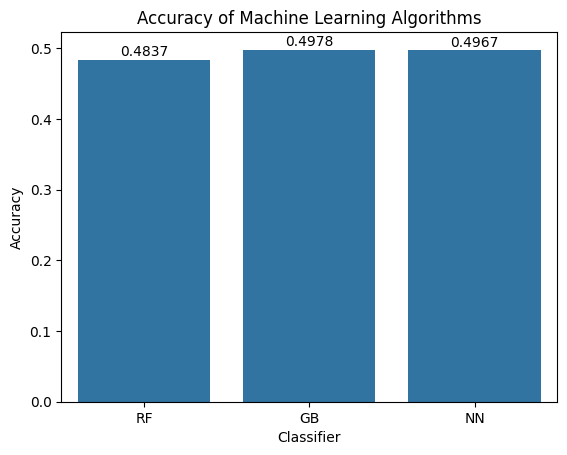

In [72]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
plt.title('Accuracy of Machine Learning Algorithms')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()